### READ ME

Use the code blocks below to answer each quiz question. Only print the output required for each question. Do not edit the comments at the top of each code cell. Otherwise, the auto-grader may misinterpret your results. See Question 0 as an an example of how to complete a task (leave it in your notebook; don't delete it):

In [1]:
# Question 0: Create a DataFrame with three rows and four columns. Name the 
# columns 'Col1', 'Col2', 'Col3', 'Col4'. Create an index for the DataFrame
# and give the rows the index values of 'Row1', 'Row2', 'Row3'. Place a value
# in each column equal to the {ColumnName/RowName}. e.g. Col1/Row1. Print
# the entire DataFrame.

import pandas as pd

df = pd.DataFrame(columns=['Col1', 'Col2', 'Col3', 'Col4'], index=['Row1', 'Row2', 'Row3'])

for col in df:
  for i, value in df[col].items():
    df.at[i, col] = f'{i}/{col}'

df

,Col1,Col2,Col3,Col4
Row1,Row1/Col1,Row1/Col2,Row1/Col3,Row1/Col4
Row2,Row2/Col1,Row2/Col2,Row2/Col3,Row2/Col4
Row3,Row3/Col1,Row3/Col2,Row3/Col3,Row3/Col4


**Question 1**: 

*  Download the airline_satisfaction.csv dataset that came along with this assignment and import it into the code cell below
*  Print out both the shape of the DataFrame and the first 5 records.


In [2]:
# Question 1: 
df_air = pd.read_csv(r'C:\Users\camde\OneDrive - Brigham Young University\IS JUNIOR CORE-Camdens-Laptop\IS 455\univariate_automation\airline_satisfaction.csv')
print(df_air.shape)
df_air.head()


(129880, 23)


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


**Question 2**: 

* Copy the unistats() function from the chapter (either of the completed versions are fine; you are also welcome to modify or improve it however you'd like as long as all statistics in the chapter are included) into the code cell below. 
* Modify the function in order to add a column that calculates the number of missing values in each column
* Run the function on the airline satisfaction DataFrame you created in the prior step.

In [3]:
# Question 2:
def univariate_stats(df, roundto = 4):
    import pandas as pd
    import numpy as np

    df_results = pd.DataFrame(columns=['dtype', 'count', 'missing', 'unique', 'mode', 
                                       'min', 'q1', 'median', 'q3', 'max', 
                                       'mean', 'std', 'skew', 'kurt'])
    
    for col in df:
        dtype = df[col].dtype
        count = df[col].count()
        missing = df[col].isna().sum()
        unique = df[col].nunique()
        try:
            mode = df[col].mode()[0]
        except:
            print(f"Mode cannot be determined for {col}")
            mode = np.nan
        
        if pd.api.types.is_numeric_dtype(df[col]):
            min = df[col].min()
            q1 = df[col].quantile(0.25)
            median = df[col].median()
            q3 = df[col].quantile(0.75)
            max = df[col].max()
            mean = df[col].mean()
            std = df[col].std()
            skew = df[col].skew()
            kurt = df[col].kurt()

            df_results.loc[col] = [dtype, count, missing, unique, mode, 
                                   round(min, roundto), round(q1, roundto), round(median, roundto),
                                    round(q3, roundto), round(max, roundto), round(mean, roundto), 
                                    round(std, roundto), round(skew, roundto), round(kurt, roundto)]
        
        else:
            df_results.loc[col] = [dtype, count, missing, unique, mode, "", "", "", "", "", "", "", "", ""]


    return df_results

univariate_stats(df_air)


,dtype,count,missing,unique,mode,min,q1,median,q3,max,mean,std,skew,kurt
satisfaction,object,129880,0,2,satisfied,,,,,,,,,
Gender,object,129880,0,2,Female,,,,,,,,,
Customer Type,object,129880,0,2,Loyal Customer,,,,,,,,,
Age,int64,129880,0,75,39,7,27.0,40.0,51.0,85,39.428,15.1194,-0.0036,-0.7191
Type of Travel,object,129880,0,2,Business travel,,,,,,,,,
Class,object,129880,0,3,Business,,,,,,,,,
Flight Distance,int64,129880,0,5398,1963,50,1359.0,1925.0,2544.0,6951,1981.4091,1027.1156,0.4667,0.3643
Seat comfort,int64,129880,0,6,3,0,2.0,3.0,4.0,5,2.8386,1.393,-0.0919,-0.9432
Departure/Arrival time convenient,int64,129880,0,6,4,0,2.0,3.0,4.0,5,2.9906,1.5272,-0.2523,-1.0894
Food and drink,int64,129880,0,6,3,0,2.0,3.0,4.0,5,2.852,1.4437,-0.1168,-0.9867


**Question 3**:

The practice problems in this chapter require you to create a function that generates the appropriate visualization for each feature to accompany the stats and metrics we calculated in the table above. You'll find sample code to complete that practice problem as a link at the bottom right corner of the problem description. It is also here: https://colab.research.google.com/drive/1nag4gKPayGATTHBv1UorftWfV4zF5RZa#forceEdit=true&offline=true&sandboxMode=true&scrollTo=wC_n0djIUS7l

Your next job is to recreate that visualization function with some slight modifications. 
* Divide it into two separate functions called: histogram() and countplot(). 
* Setup the functions to accept a Pandas Series or DataFrame with one column--the column that needs to be visualized.
* Each function should allow the caller to specify (as a parameter) whether they want to include statistics in the visualization. 
   * Histogram: include the min, max, mean, std, and skew if the caller indicates they want stats printed on the chart.
   * Countplot: include a total count of values and the number of missing values if the caller indicates they want stats printed on the cart.
* Call these functions from within the unistats function in the appropriate places so that every column in any DataFrame passed into unistats has the statistics calculated and added to a results table (as it already does) and also prints out the appropriate chart for that column of date. 
* Rename the overall function to "univariate" to indicate that it does more than just calculate stats
* Add a parameter that allows the caller of univariate to indicate whether they want the results table printed and another to indicate whether they want the visualizations printed. In other words, when you call univariate, you can "turn off" either the stats or visualizations. 
* Call this overall function using the airline satisfaction dataset and show stats on the charts.
* This will be a large code cell, but that's okay. Include all three functions and the call in the code block below:

C:\Users\camde\AppData\Local\Temp\ipykernel_12524\1235167919.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(8,5))  # Create a figure and axis


,dtype,count,missing,unique,mode,min,q1,median,q3,max,mean,std,skew,kurt
satisfaction,object,129880,0,2,satisfied,,,,,,,,,
Gender,object,129880,0,2,Female,,,,,,,,,
Customer Type,object,129880,0,2,Loyal Customer,,,,,,,,,
Age,int64,129880,0,75,39,7,27.0,40.0,51.0,85,39.428,15.1194,-0.0036,-0.7191
Type of Travel,object,129880,0,2,Business travel,,,,,,,,,
Class,object,129880,0,3,Business,,,,,,,,,
Flight Distance,int64,129880,0,5398,1963,50,1359.0,1925.0,2544.0,6951,1981.4091,1027.1156,0.4667,0.3643
Seat comfort,int64,129880,0,6,3,0,2.0,3.0,4.0,5,2.8386,1.393,-0.0919,-0.9432
Departure/Arrival time convenient,int64,129880,0,6,4,0,2.0,3.0,4.0,5,2.9906,1.5272,-0.2523,-1.0894
Food and drink,int64,129880,0,6,3,0,2.0,3.0,4.0,5,2.852,1.4437,-0.1168,-0.9867


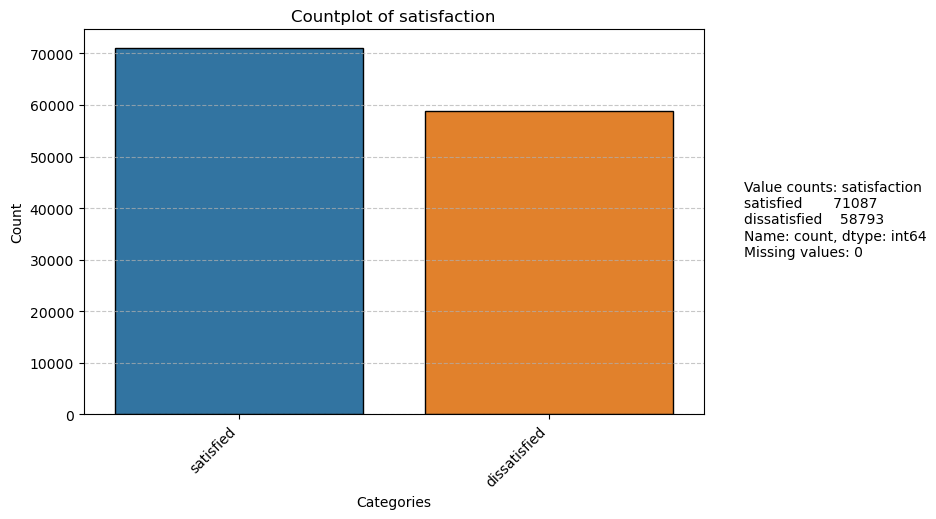

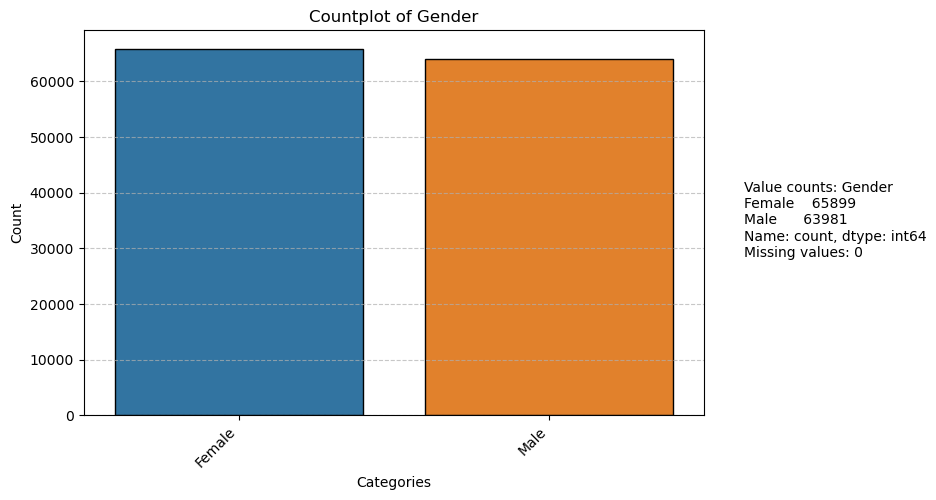

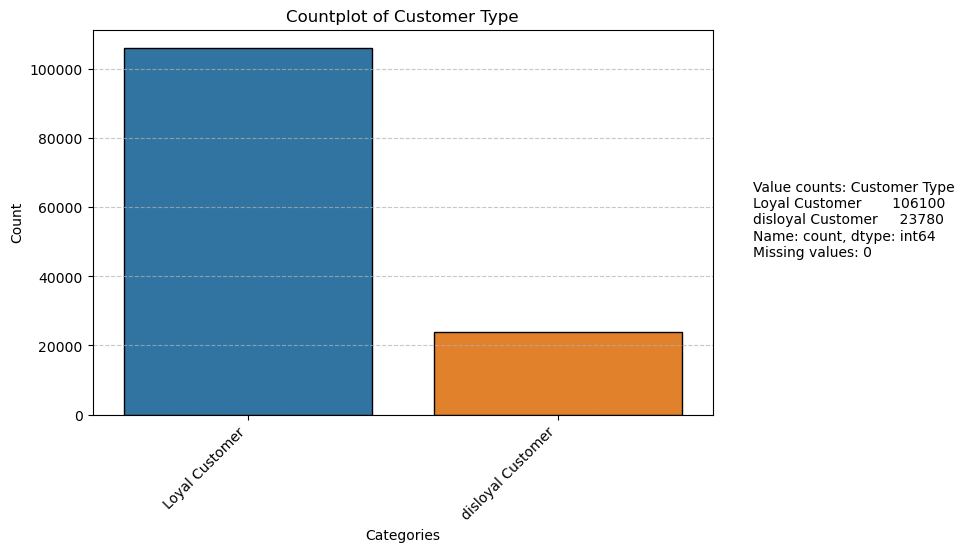

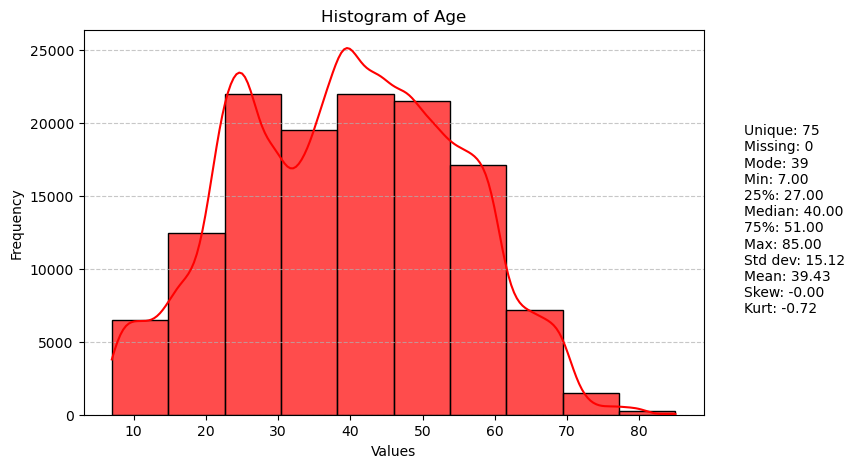

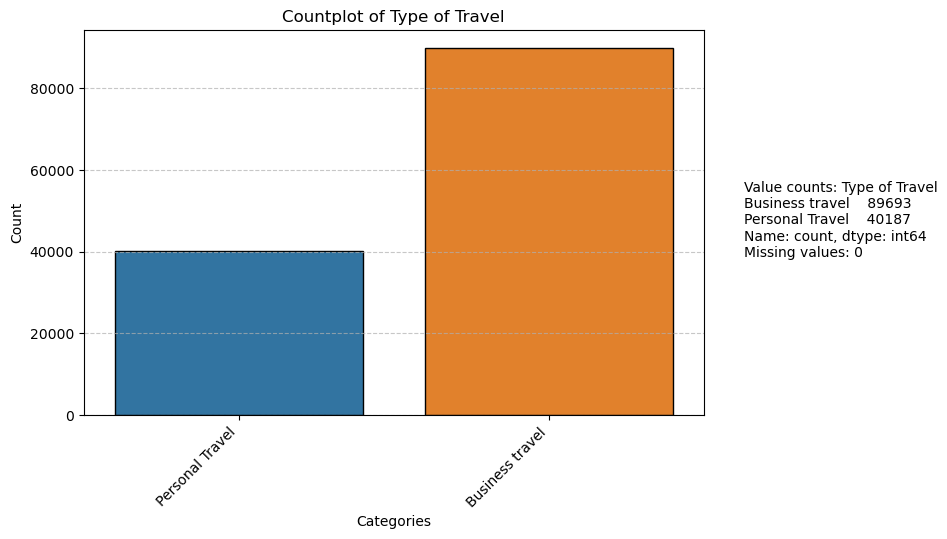

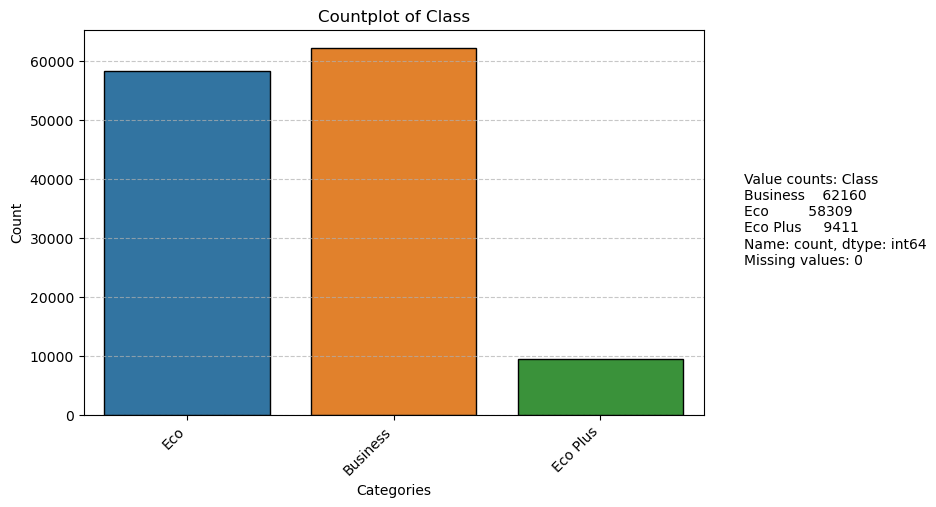

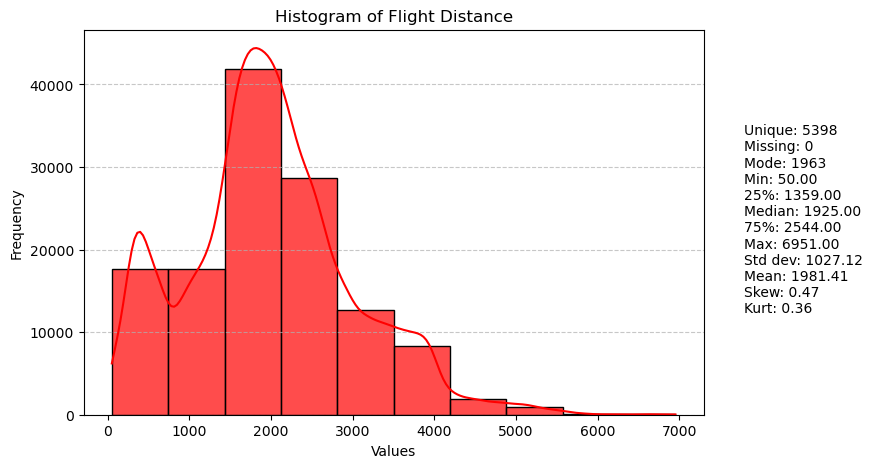

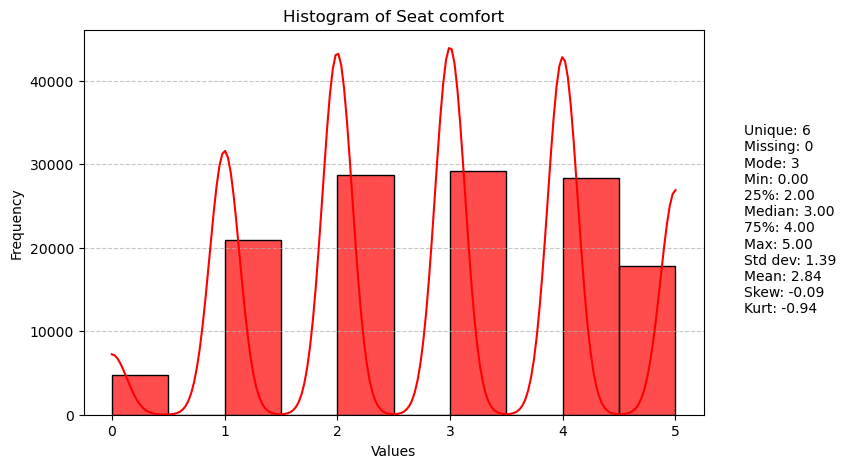

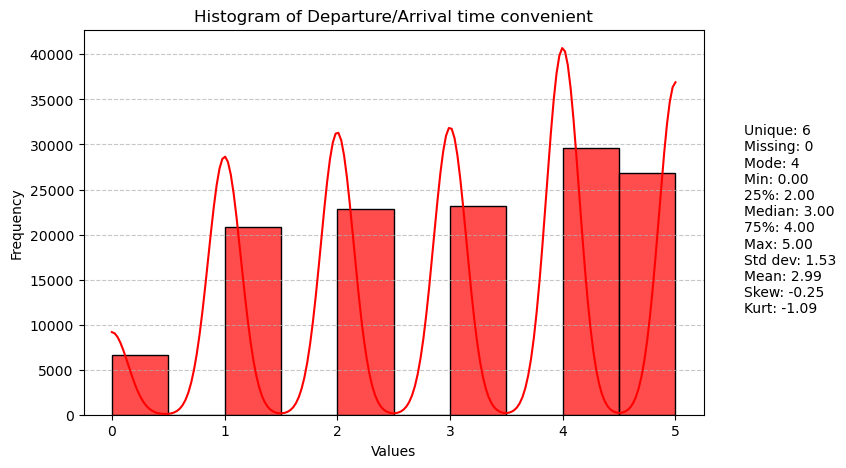

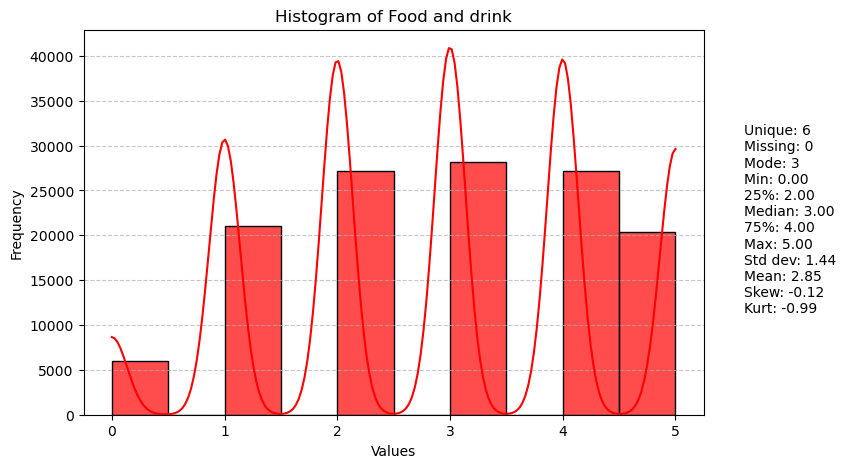

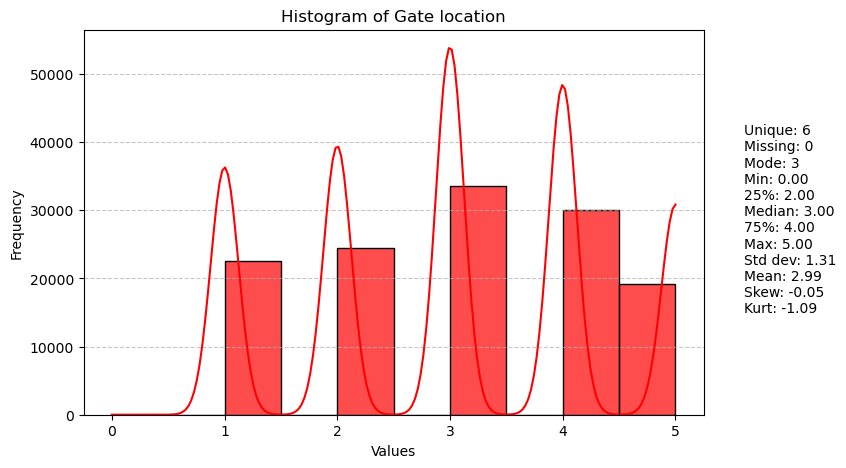

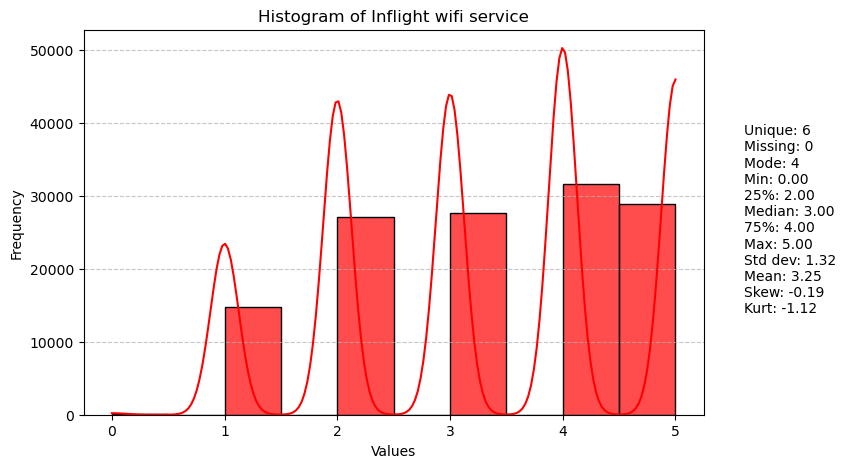

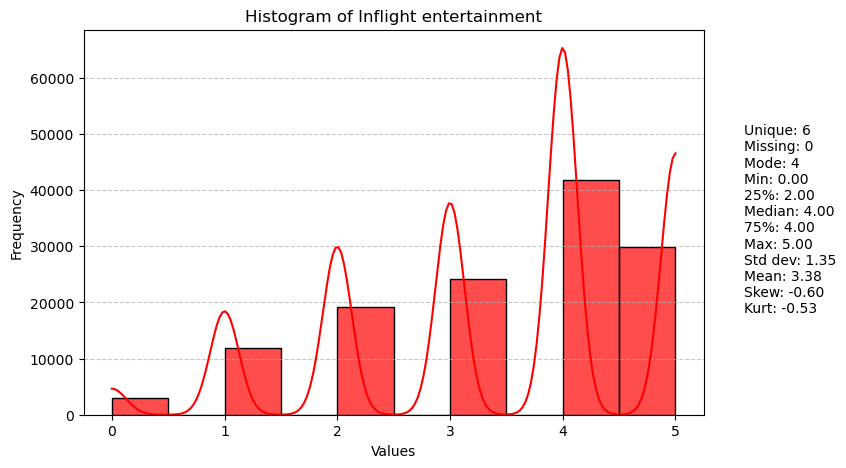

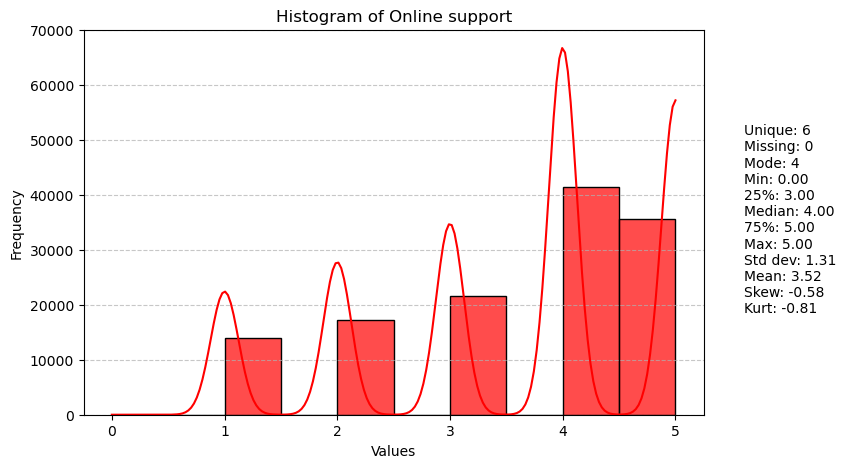

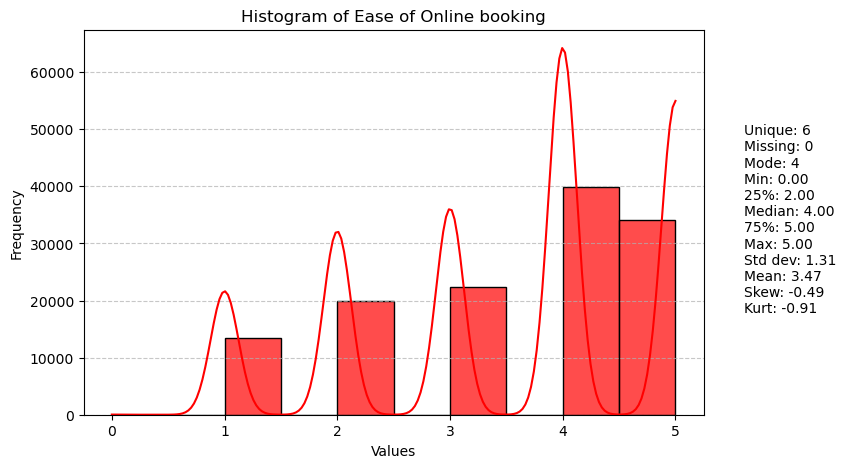

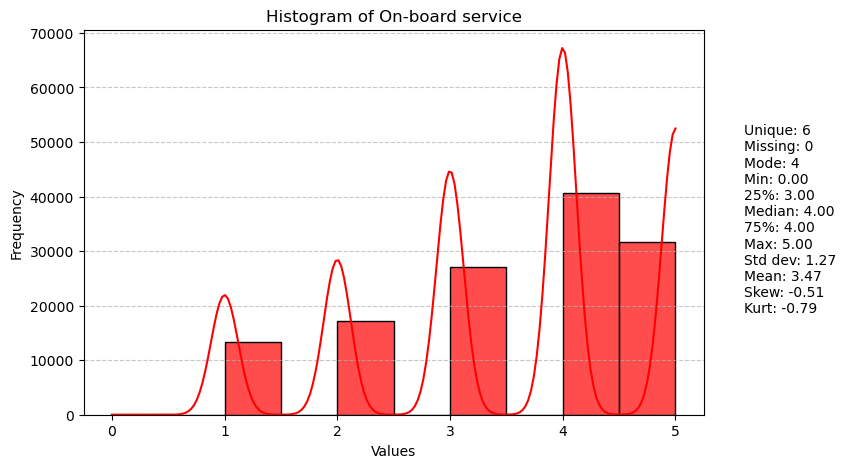

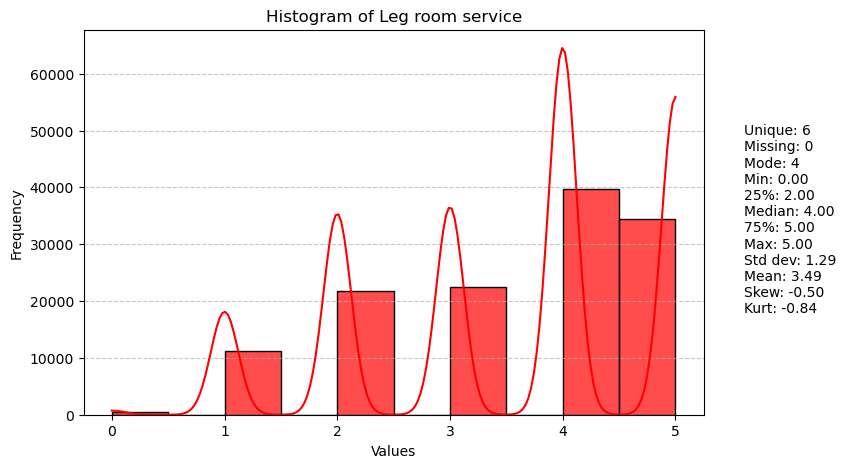

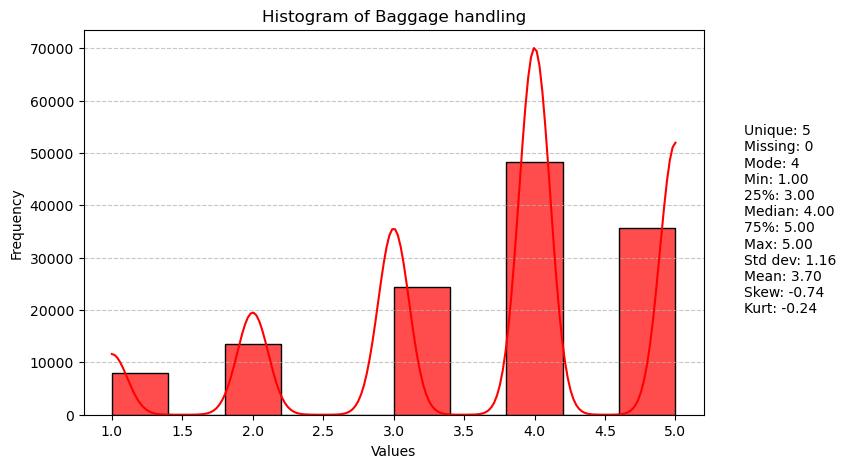

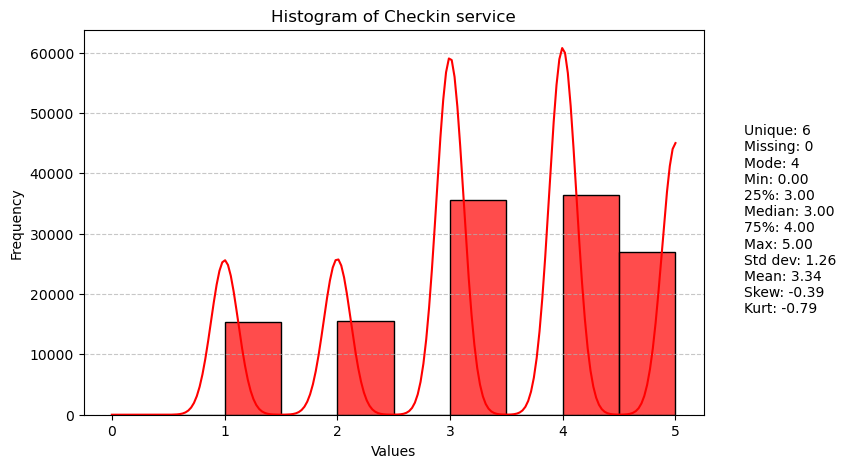

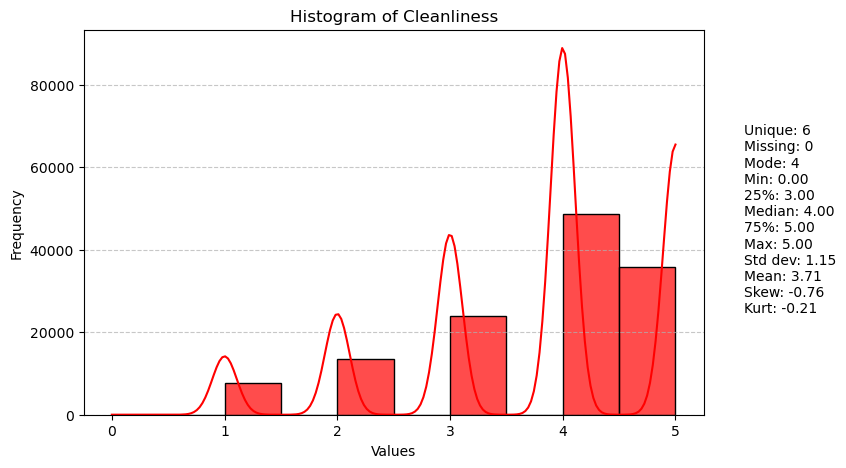

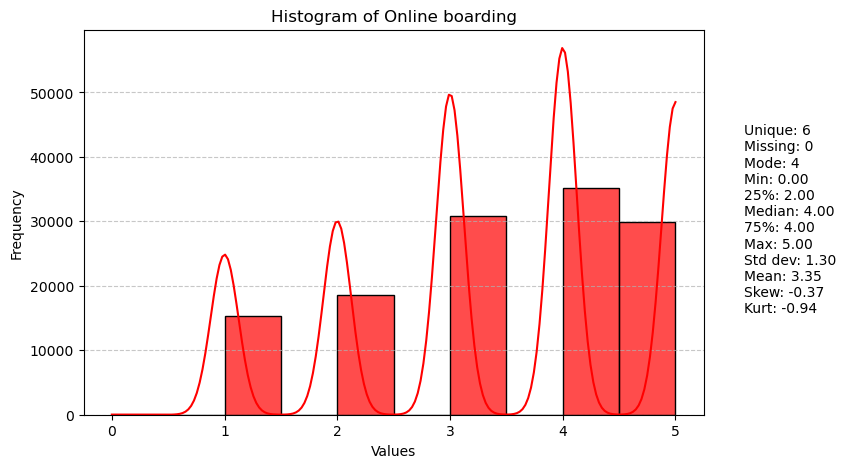

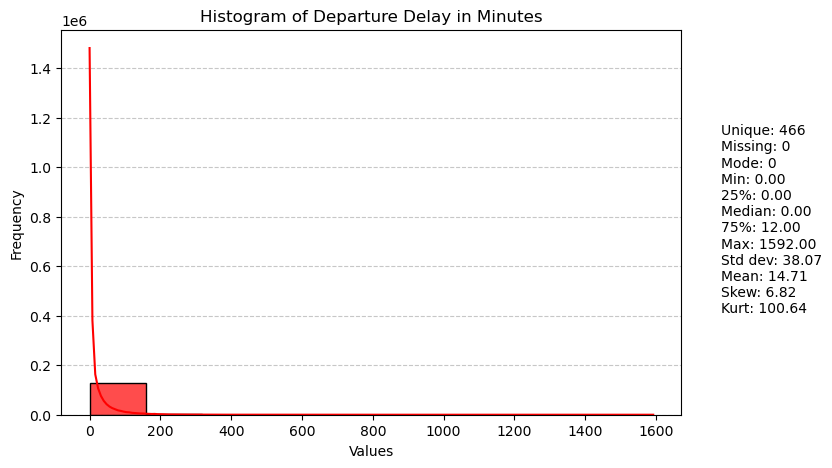

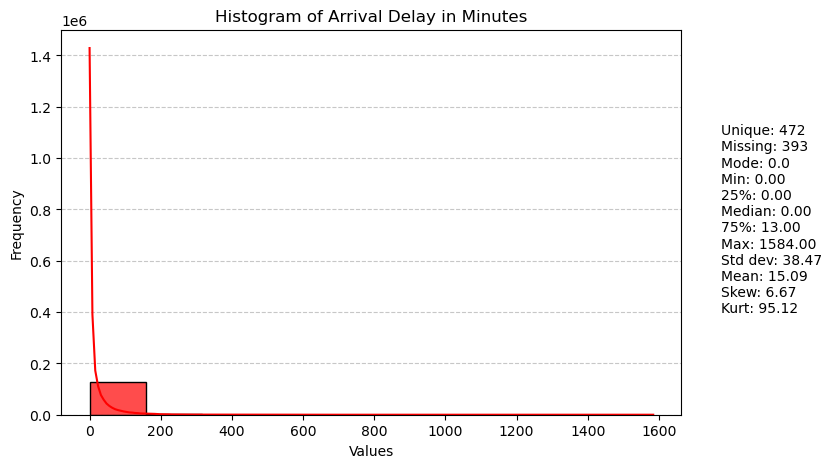

In [4]:
# Question 3:
def histogram(col, bins=10):
    import matplotlib.pyplot as plt
    import seaborn as sns

    fig, ax = plt.subplots(figsize=(8,5))  # Create a figure and axis
    sns.histplot(col, bins=bins, kde=True, color='red', edgecolor='black', alpha=0.7, ax=ax)
    
    ax.set_xlabel("Values")
    ax.set_ylabel("Frequency")
    ax.set_title(f"Histogram of {col.name}")
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    return fig  # Return the figure 
    

def countplot(col):
    import seaborn as sns
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(figsize=(8, 5))  # Create a figure and axis
    
    sns.countplot(x=col, hue=col, edgecolor="black", ax=ax)  # Pass ax to sns.countplot
    
    ax.set_xlabel("Categories")
    ax.set_ylabel("Count")
    ax.set_title(f"Countplot of {col.name}")
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right") 
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    return fig  # Return the figure object


def univariate(df, roundto=4, hist_plt=True, count_plt=True, stats=True):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt

    df_results = pd.DataFrame(columns=['dtype', 'count', 'missing', 'unique', 'mode', 
                                       'min', 'q1', 'median', 'q3', 'max', 
                                       'mean', 'std', 'skew', 'kurt'])
    
    for col in df:
        dtype = df[col].dtype
        count = df[col].count()
        missing = df[col].isna().sum()
        unique = df[col].nunique()
        try:
            mode = df[col].mode()[0]
        except:
            print(f"Mode cannot be determined for {col}")
            mode = np.nan
        
        if pd.api.types.is_numeric_dtype(df[col]):
            min = df[col].min()
            q1 = df[col].quantile(0.25)
            median = df[col].median()
            q3 = df[col].quantile(0.75)
            max = df[col].max()
            mean = df[col].mean()
            std = df[col].std()
            skew = df[col].skew()
            kurt = df[col].kurt()

            df_results.loc[col] = [dtype, count, missing, unique, mode, 
                                   round(min, roundto), round(q1, roundto), round(median, roundto),
                                    round(q3, roundto), round(max, roundto), round(mean, roundto), 
                                    round(std, roundto), round(skew, roundto), round(kurt, roundto)]
            
        
        else:
            df_results.loc[col] = [dtype, count, missing, unique, mode, "", "", "", "", "", "", "", "", ""]


        if pd.api.types.is_numeric_dtype(df[col]) and hist_plt:
            fig = histogram(df[col])
            if stats:
                stats_text = (
                f"Unique: {unique}\n"
                f"Missing: {missing}\n"
                f"Mode: {mode}\n"
                f"Min: {min:.2f}\n"
                f"25%: {q1:.2f}\n"
                f"Median: {median:.2f}\n"
                f"75%: {q3:.2f}\n"
                f"Max: {max:.2f}\n"
                f"Std dev: {std:.2f}\n"
                f"Mean: {mean:.2f}\n"
                f"Skew: {skew:.2f}\n"
                f"Kurt: {kurt:.2f}"
                )
                fig.text(0.95, 0.5, stats_text, fontsize=10, va='center', transform=fig.transFigure)
                

        if not pd.api.types.is_numeric_dtype(df[col]) and count_plt:
            fig = countplot(df[col])
            if stats:
                stats_text = f"Value counts: {df[col].value_counts()}\nMissing values: {df[col].isna().sum()}"
                fig.text(0.95, 0.5, stats_text, fontsize=10, va='center', transform=fig.transFigure)
        
    return df_results


univariate(df_air)